# Lab 4.1: Likelihood

One way to estimate parameters for a distribution is to calculate the likelihood of the parameter values given the data that we observe.

The likelihood of a parameter $\theta$ is given by the notion $\mathcal{L}(\theta)$ which has the same/similar form as the probability function $p(data \mid \theta)$.

### Question 1

The file `outage.csv` contains the number of power outages Kampala (Ugandan city) experiences each month for the past 72 months

1. Read in the `https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv` using pandas
2. Plot the data on a histogram 
  - Set `normed=True` to get the probability density histogram
  - Set `bins=20` to get smaller bins for the histogram

3.  What distribution would you consider fitting the data to given the nature of the data ?
  - Think about if the data is discrete or continuous 
  - Think about what the data describes

4. Write down the equation that would model the random variable in question with the distribution you have chosen

   For example:
   - $\text{Let X be the number of heads in 5 coin flips}$
   - $X \sim Binomial(n, p)$

5. Write down the likelihood function to calculate the likelihood of a given parameter value 

   **Hint**:
   - A **parameter** of the binomial distribution will be `n` or `p` for example
   - This will be based on the distribution you have chosen above
   - The likelihood function would be the product of the probabilities for each data point 
  
6. Write a python function that will calculate the likelihood of a parameter given the data
   - The function will take a parameter and the data
   - Use `scipy.stats` and `numpy.product()`
 
7. Define a range of possible values for the parameter from `14` to `21` (using `numpy.linspace`).

   Calculate the likelihood for each of the values defined in the range.
   
   Plot the values ($x$) against the likelihood ($L(\theta)$)  

8. Write a function to calculate the log-likelihood.

9. Find the maximum likelihood estimate for the parameter of interest (use `numpy.argmax`)

### Question 2

The file `plants.csv` contains heights to 1,000 plants. You are told the data resembles a normal distribution with a standard deviation of 3cm.

1. Read in `https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv` using pandas and plot the data on a histogram
   
2. Define a range of possible values for the mean (from 32 to 42)
  
3. Calculate the log-liklihood for each of the values in the range 
  
4. Plot the log-likelihood function

5. Find the MLE for the mean

In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#The file outage.csv contains the number of power 
#outages Kampala (Ugandan city) experiences each month for the past 72 months
power_outage_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv')
#power_outage_df.value_counts
power_outage_df.head()

,0
0,20
1,20
2,14
3,14
4,18


In [3]:
import seaborn as sns

Plot the data on a histogram
Set normed=True to get the probability density histogram
Set bins=20 to get smaller bins for the histogram

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


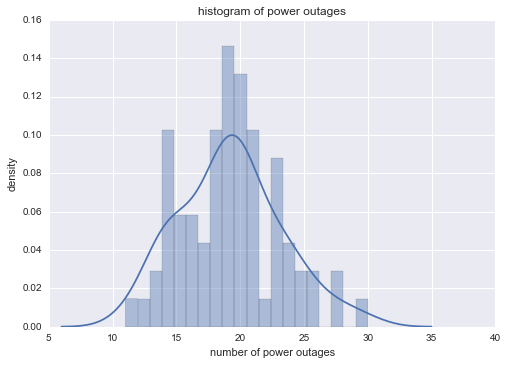

In [4]:
sns.distplot(power_outage_df,bins=20,norm_hist=True)
ylabel('density')
xlabel('number of power outages')
plt.title('histogram of power outages');

 ## What distribution would you consider fitting the data to given the nature of the data ?
## Think about if the data is discrete or continuous
## Think about what the data describes

The data is discrete.

The Poisson distribution would be a good function to represent this data. We have an average number of power outages per month which is modeled by lambda.


### Write down the equation that would model the random variable in question with the distribution you have chosen
#### For example:
#### Let X be the number of heads in 5 coin flipsLet X be the number of heads in 5 coin flips 
#### X∼Binomial(n,p)X∼Binomial(n,p) 

- For our lambda distribution,  let L be the average number of power outages per month. 

Poisson(L,K )= ${\displaystyle {\frac {\lambda ^{k}e^{-\lambda }}{k!}}}$

## Write down the likelihood function to calculate the likelihood of a given parameter value
- Hint:
- A parameter of the binomial distribution will be n or p for example
- This will be based on the distribution you have chosen above
- The likelihood function would be the product of the probabilities for each data point

$L(\lambda;K) = \prod_{i=1}^N {\lambda^{K_i}* e ^{-\lambda} \over K_i!}$

# Write a python function that will calculate the likelihood of a parameter given the data
- The function will take a parameter and the data
- Use scipy.stats and numpy.product()

In [5]:
import scipy.stats
print (power_outage_df)

     0
0   20
1   20
2   14
3   14
4   18
5   23
6   19
7   14
8   21
9   15
10  24
11  28
12  20
13  28
14  14
15  17
16  16
17  18
18  18
19  21
20  17
21  24
22  25
23  13
24  26
25  19
26  23
27  11
28  21
29  18
..  ..
42  22
43  19
44  17
45  18
46  21
47  14
48  16
49  20
50  16
51  19
52  13
53  21
54  15
55  19
56  26
57  21
58  23
59  14
60  23
61  30
62  20
63  15
64  19
65  25
66  20
67  21
68  19
69  24
70  19
71  20

[72 rows x 1 columns]


In [6]:
def poisson_likelihood(data,L):
    
    #p = [scipy.stats.poisson.pmf(item,L) for item in data]
    #sum = 0
    p=scipy.stats.poisson(L)
    return numpy.product(p.pmf(data))
    #return p

In [7]:
poisson_likelihood(power_outage_df,20)

7.4252711566364104e-89

In [8]:
def find_max_prob(data,number):
    probability_lambda ={}
    
    max_prob = 0
    for L in linspace(14, 21,num=number*2):
        if poisson_likelihood(data,L) > max_prob:
            max_prob = poisson_likelihood(data,L)
            probability_lambda[poisson_likelihood(data,L)]=L
        else:
            probability_lambda[poisson_likelihood(data,L)]=L
    #print(max_prob,'maximum probability')
    #print(probability_lambda[max_prob],'lambda')
    
    df_prob =  pd.DataFrame(probability_lambda,index=['lambda'])
    #df_prob.set_index(['probability','lambda'])
    
    print(max_prob,'maximum probability')
    print(probability_lambda[max_prob],'lambda')
    return df_prob
#sns.distplot(poisson_likelihood(power_outage_df,1));

In [9]:

find_max_prob(power_outage_df,100)

2.15165350778e-88 maximum probability
19.2412060302 lambda


,8.84532754984e-116,2.27089953305e-115,5.77967850161e-115,1.45831071899e-114,3.64800821894e-114,9.04772701349e-114,2.22494642771e-113,5.42518221932e-113,1.31172253271e-112,3.14499926659e-112,...,2.03678756232e-88,2.06824966259e-88,2.0786250476e-88,2.10322243083e-88,2.11138073599e-88,2.12901647239e-88,2.13463891786e-88,2.14524630204e-88,2.14811344344e-88,2.15165350778e-88
lambda,14.0,14.035176,14.070352,14.105528,14.140704,14.175879,14.211055,14.246231,14.281407,14.316583,...,19.065327,19.38191,19.100503,19.346734,19.135678,19.311558,19.170854,19.276382,19.20603,19.241206


## Optimal Lambda is 19.26, with a very small percent probability. This is because we have not convered to log scale.

/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


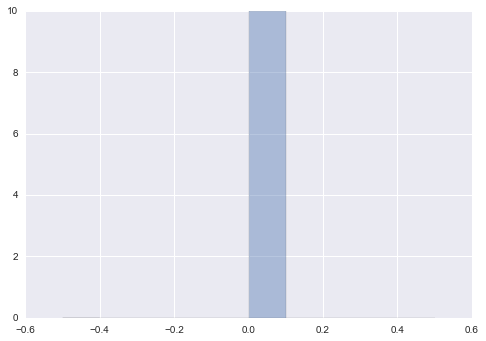

In [10]:
sns.distplot([poisson_likelihood(power_outage_df,L) for L in range(5)],bins=10,norm_hist=True);


## Define a range of possible values for the parameter from 14 to 21 (using numpy.linspace).
- Calculate the likelihood for each of the values defined in the range.
- Plot the values ( xx ) against the likelihood ( L(θ)L(θ) )

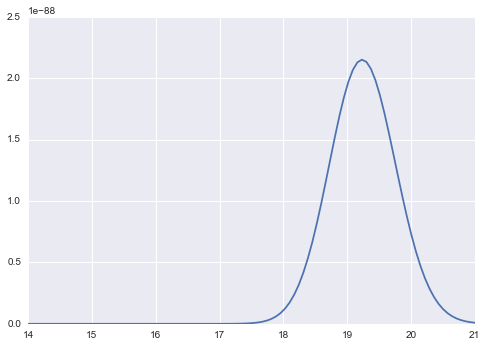

In [11]:
x = np.linspace(14,21,100)
y = [poisson_likelihood(power_outage_df,a) for a in x]

plot(x, y);


- Write a function to calculate the log-likelihood.
- Find the maximum likelihood estimate for the parameter of interest (use numpy.argmax)

In [12]:
def find_max_prob_log(data,number):
    probability_lambda ={}
    
    max_prob = 0
    
    for L in linspace(14, 21,num=number*2):
        if poisson_likelihood(data,L) > max_prob:
            max_prob = poisson_likelihood(data,L)
            probability_lambda[poisson_likelihood(data,L)]=L
        else:
            probability_lambda[poisson_likelihood(data,L)]=L
    #print(max_prob,'maximum probability')
    #print(probability_lambda[max_prob],'lambda')
    
    df_prob =  pd.DataFrame(probability_lambda,index=['lambda'])
    #df_prob.set_index(['probability','lambda'])
    
    print(np.log(max_prob),'maximum probability in log')
    print(probability_lambda[max_prob],'lambda')
    return df_prob
#sns.distplot(poisson_likelihood(power_outage_df,1));

In [13]:
find_max_prob_log(power_outage_df,100)

-201.861251564 maximum probability in log
19.2412060302 lambda


,8.84532754984e-116,2.27089953305e-115,5.77967850161e-115,1.45831071899e-114,3.64800821894e-114,9.04772701349e-114,2.22494642771e-113,5.42518221932e-113,1.31172253271e-112,3.14499926659e-112,...,2.03678756232e-88,2.06824966259e-88,2.0786250476e-88,2.10322243083e-88,2.11138073599e-88,2.12901647239e-88,2.13463891786e-88,2.14524630204e-88,2.14811344344e-88,2.15165350778e-88
lambda,14.0,14.035176,14.070352,14.105528,14.140704,14.175879,14.211055,14.246231,14.281407,14.316583,...,19.065327,19.38191,19.100503,19.346734,19.135678,19.311558,19.170854,19.276382,19.20603,19.241206


# Question 2
- The file plants.csv contains heights to 1,000 plants. You are told the data resembles a normal distribution with a - - standard deviation of 3cm.
- Read in https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv using pandas and plot the data on a histogram

In [14]:
plants_df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv')
plants_df.head()

,0
0,38.908525
1,43.156130
2,39.910492
3,42.520638
4,40.462430


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


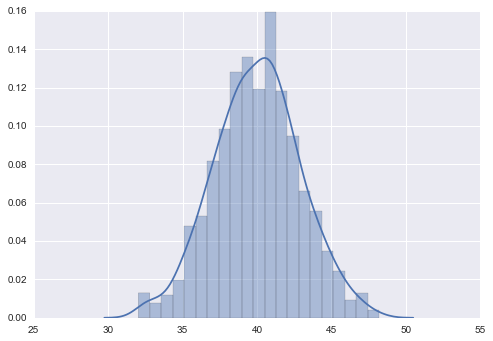

In [15]:
sns.distplot(plants_df,norm_hist=True);

# Define a range of possible values for the mean (from 32 to 42)

In [16]:
def log_probabilility_norm(data,mean,s):
    '''return normal probability likelihood associated with each mean'''
    normal_dist = scipy.stats.norm(scale=s, loc=mean)
    
    return sum(np.log(normal_dist.pdf(data)))

In [17]:
# log probabilities
print([log_probabilility_norm(plants_df,x,3.0) for x in np.linspace(32,42)])

[-6046.6253576859126, -5867.1430895571502, -5692.2885228490986, -5522.061657561746, -5356.4624936951022, -5195.4910312491593, -5039.1472702239244, -4887.4312106193884, -4740.3428524355631, -4597.8821956724369, -4460.0492403300195, -4326.8439864083011, -4198.2664339072926, -4074.3165828269834, -3954.9944331673832, -3840.2999849284834, -3730.233238110291, -3624.7941927127999, -3523.9828487360128, -3427.7992061799341, -3336.2432650445558, -3249.3150253298854, -3167.0144870359163, -3089.3416501626539, -3016.2965147100936, -2947.8790806782399, -2884.0893480670884, -2824.9273168766431, -2770.3929871069004, -2720.4863587578639, -2675.2074318295299, -2634.5562063219022, -2598.5326822349771, -2567.1368595687563, -2540.3687383232409, -2518.2283184984285, -2500.7156000943223, -2487.8305831109192, -2479.5732675482204, -2475.9436534062265, -2476.9417406849366, -2482.567529384351, -2492.8210195044699, -2507.7022110452936, -2527.2111040068212, -2551.3476983890523, -2580.1119941919883, -2613.503991415

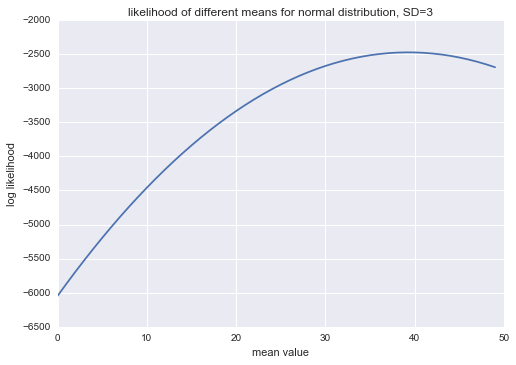

In [18]:
plot([log_probabilility_norm(plants_df,x,3.0) for x in np.linspace(32,42)])
ylabel('log likelihood')
xlabel('mean value')
plt.title('likelihood of different means for normal distribution, SD=3');

In [19]:
#print([log_probabilility_norm(plants_df,x,3.0) for x in np.linspace(32,42,num=100)])


In [20]:
def find_max_log_likelihood_norm(data,s):
    mean_prob = {}
    
    max_log = -99999999999999999
    
    for x in np.linspace(32,42,num=100):
        if log_probabilility_norm(data,x,s) > max_log:
            max_log = log_probabilility_norm(data,x,s)
            mean_prob[log_probabilility_norm(data,x,s)] = x
        else:
            mean_prob[log_probabilility_norm(data,x,s)] = x
    
    
    print(mean_prob[max_log],'optimial mean')
    print(max_log,'maximum log probability')
        

In [21]:
find_max_log_likelihood_norm(plants_df,3.0)

39.9797979798 optimial mean
-2475.83435632 maximum log probability
